# EDP Elípticas con Diferencias Finitas

Recordemos que una ecuación diferencial parcial o EDP (PDE en inglés) es una ecuación que involucra funciones en dos o más variables y sus derivadas parciales. En este caso estudiamos las ecuaciones de tipo

$$Au_{xx} + Bu_{xy} + Cu_{yy} + f(u_x, u_y, u, x, y) = 0$$

donde $A$, $B$ y $C$ son escalares y además $x,y$ son las variables independientes.

El discriminante de estas ecuaciones $B^2 -4AC$ nos indicará si una ecuación es parabólica, elíptica o hiperbólica. Las ecuaciones que nos interesan ahora son elípticas, por lo tanto cumplen con que $B^2-4AC < 0$.

Las ecuaciones elípticas, a diferencia de los otros tipos, poseen condiciones de borde para ambas variables independientes.

Definiciones:

1. Nunca deben olvidar la fórmula del **laplaciano** de una función! Es simplemente la suma de las segundas derivadas respecto a una misma variable.
$$\mathcal{L}(u) = \Delta u = u_{xx} + u_{yy}$$

2. La ecuación $\Delta u = f(x,y)$ es conocida como **Ecuación de Poisson**. En particular cuando $f(x,y) = 0$ la ecuación se conoce como **Ecuación de Laplace**. (Notar cómo la definición de las ecuaciones es consistente con que sean elípticas...)

Existen dos tipos de condiciones de borde. Se puede imponer una condición en el borde tanto para $u$ (condiciones de Dirichlet) como para alguna derivada direccional $\partial u / \partial n$ (Condiciones de Neumann)

## Aplicación del Método

Como siempre declaramos el problema: Resolveremos la ecuación $\Delta u = f$ en un rectángulo dado $[x_l, x_r] \times [y_b, y_t]$. Además consideremos las condiciones de borde de Dirichlet que definen alguna función $g$ para cada borde, digamos:

\begin{align*}
u(x,y_b) = g_1(x)\\
u(x,y_t) = g_2(x)\\
u(x_l,y) = g_3(y)\\
u(x_r,y) = g_4(y)
\end{align*}

Ahora debemos discretizar el dominio bidimensional. Para $m$ puntos en el eje horizontal y $n$ en el vertical, es decir con $M = m-1$ y $N = n-1$ steps de tamaño $h = (x_r − x_l)/M$ and $k=(y_t − y_ b)/N$. Si reemplazamos las diferencias finitas centradas que estudiamos anteriormente en la ecuación de Poisson obtenemos:

$$\frac{u(x-h,y) -2u(x,y) + u(x+h,y)}{h^2} + \mathcal{O}(h^2) + \frac{u(x,y-k) -2u(x,y) + u(x,y+k)}{k^2} + \mathcal{O}(k^2)  = f(x,y)$$

Trasladando esto a las soluciones aproximadas $w$ obtenemos
$$\frac{w_{i-1,j} -2w_{ij} + w_{i+1,j}}{h^2} + \frac{w_{i,j-1}-2w_{ij}+ w_{i,j+1}}{k^2} = f(x_i, y_j)$$

Donde $x_i = x_l + (i − 1)h$ y $y_j = y_b + (j − 1)k$

Las incógnitas a resolver, al estar situadas en dos dimensiones, son incómodas de abordar, por lo que simplemente indexaremos de forma lineal las aproxmaciones $w_{ij}$

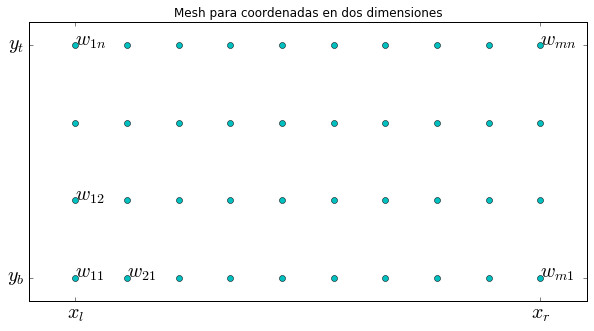

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata

m, n = 10, 4
xl, xr = (0.0, 1.0)
yb, yt = (0.0, 1.0)
h = (xr - xl) / (m - 1.0)
k = (yt - yb) / (n - 1.0)
xx = [xl + (i - 1)*h for i in range(1, m+1)]
yy = [yb + (i - 1)*k for i in range(1, n+1)]
plt.figure(figsize=(10, 5))
for y in yy:
    plt.plot(xx, [y for _x in xx], 'co')
plt.xlim(xl-0.1, xr+0.1)
plt.ylim(yb-0.1, yt+0.1)
plt.xticks([xl, xr], ['$x_l$', '$x_r$'], fontsize=20)
plt.yticks([yb, yt], ['$y_b$', '$y_t$'], fontsize=20)
plt.text(xl, yb, "$w_{11}$", fontsize=20)
plt.text(xl+h, yb, "$w_{21}$", fontsize=20)
plt.text(xl, yb+k, "$w_{12}$", fontsize=20)
plt.text(xl, yt, "$w_{1n}$", fontsize=20)
plt.text(xr, yt, "$w_{mn}$", fontsize=20)
plt.text(xr, yb, "$w_{m1}$", fontsize=20)
plt.title("Mesh para coordenadas en dos dimensiones")
plt.show()

Para simplificar el sistema a resolver, cambiaremos los índices dobles por indices lineales mediante la conversión
$$v_{i+(j-1)m} = w_{ij}$$
Se puede pensar también como una operación de *stack* donde las filas de la grilla son colocadas una al lado de otra en orden.

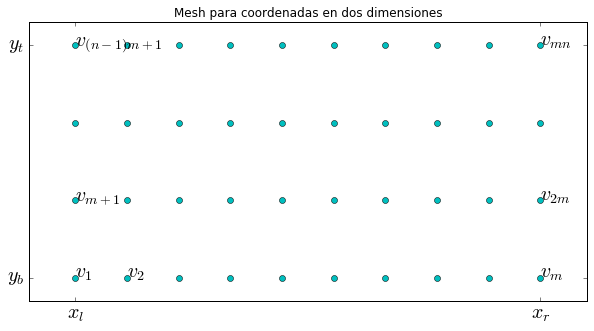

In [48]:
plt.figure(figsize=(10,5))
plt.title("Mesh para coordenadas lineales")
for y in yy:
    plt.plot(xx, [y for _x in xx], 'co')
plt.xlim(xl-0.1, xr+0.1)
plt.ylim(yb-0.1, yt+0.1)
plt.xticks([xl, xr], ['$x_l$', '$x_r$'], fontsize=20)
plt.yticks([yb, yt], ['$y_b$', '$y_t$'], fontsize=20)
plt.text(xl, yb, "$v_{1}$", fontsize=20)
plt.text(xl+h, yb, "$v_{2}$", fontsize=20)
plt.text(xl, yb+k, "$v_{m+1}$", fontsize=20)
plt.text(xr, yb+k, "$v_{2m}$", fontsize=20)
plt.text(xl, yt, "$v_{(n-1)m+1}$", fontsize=20)
plt.text(xr, yt, "$v_{mn}$", fontsize=20)
plt.text(xr, yb, "$v_{m}$", fontsize=20)
plt.title("Mesh para coordenadas en dos dimensiones")
plt.show()
plt.show()

Luego debemos construir una matriz $A$ y un vector $b$ bajo esta nueva numeración tal que el sistema $Av=b$ sea resoluble y el resultado podamos trasladarlo de vuelta al sistema de $w_{ij}$. Esta matriz naturalmente será de tamaño $mn \times mn$ y cada punto de la grilla tendrá su propia ecuación, como uno podría pensar.

La entrada $A_{pq}$ corresponde al $q$-ésimo coeficiente lineal de la $p$-ésima ecuación del sistema $Av =b$. Por ejemplo la ecuación

$$\frac{w_{i-1,j} -2w_{ij} + w_{i+1,j}}{h^2} + \frac{w_{i,j-1}-2w_{ij}+ w_{i,j+1}}{k^2} = f(x_i, y_j)$$

Corresponde a la ecuación para el punto $(i,j)$ de la grilla, y será la ecuación $p = i + (j-1)m$. Entonces, la entrada $A_{pq}$ no es más que, dada la conversión definida:

\begin{align*}
A_{i + (j-1)m, i + (j-1)m} &= -\frac{2}{h^2}- \frac{2}{k^2}\\
A_{i + (j-1)m, i+1 + (j-1)m} &= \frac{1}{h^2}\\
A_{i + (j-1)m, i-1 + (j-1)m} &= \frac{1}{h^2}\\
A_{i + (j-1)m, i + jm} &= \frac{1}{k^2}\\
A_{i + (j-1)m, i + (j-2)m} &= \frac{1}{k^2}\\
\end{align*}

Análogamente los $b$ del lado derecho del sistema son, naturalmente, la función dada en el punto $(x_i, y_j)$

$$b_{i+(j-1)m} =  f(x_i, y_j)$$

Como las condiciones de borde son conocidas estas ecuaciones excluyen dichos puntos, los índices $i,j$ van desde $1 < i < m$ y $1< j<n$. Las ecuaciones correspondientes a los bordes también consisten en evaluar las funciones dadas en los puntos $(x_i, y_j)$ e introducen $1$'s en la matriz $A$, mientras que para $b$ esto se traduce a colocar $g_s(z)$ donde corresponda utilizando la misma convención lineal (No vale la pena repasar estas ecuaciones).

Al final del día este sistema sigue siendo lineal, y con métodos básicos podemos resolverlos sin problemas!

## Ejemplo

1) Aplique diferencias finitas para una grilla de 25 puntos (5 por lado) para aproximar la solución de la ecuación de Laplace en el rectángulo $[0,1]\times[1,2]$ dadas las siguientes condiciones de borde:

\begin{align*}
u(x,1) &= \ln(x^2+1)\\
u(x,2) &= \ln(x^2+4)\\
u(0,y) &= 2\ln(y)\\
u(1,y) &= \ln(y^2+1)
\end{align*}

2) Verifique que la solución analítica resulta ser $u(x,y) = \ln(x^2+y^2)$.

3) Proponga un método para calcular los errores para cada punto de la grilla excluyendo los puntos de borde.

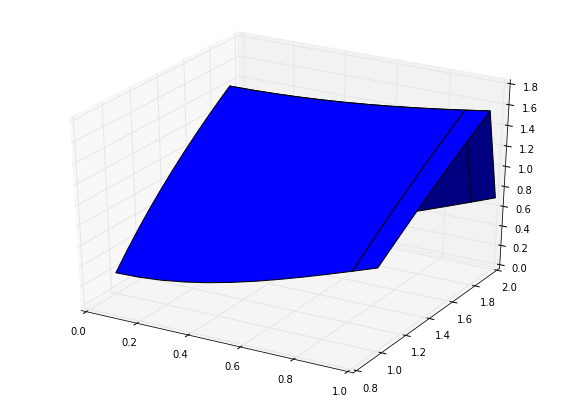

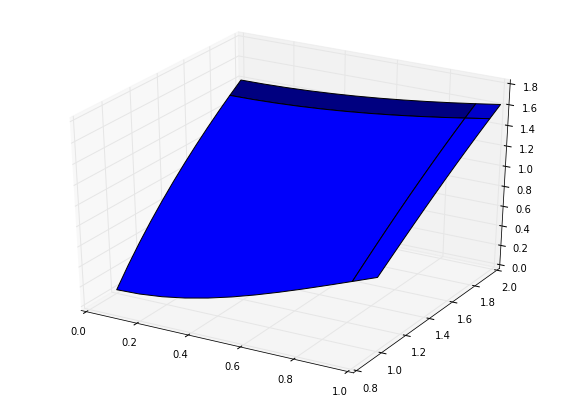

In [98]:
def f(x,y):
    return 0.0

def g1(x):
    return np.log(x**2 + 1)

def g2(x):
    return np.log(x**2 + 4)

def g3(y):
    return 2*np.log(y)

def g4(y):
    return np.log(y**2 + 1)

# definir stepsize y otros
m, n = 12, 12
mn = m * n
M = m - 1
N = n - 1
xl, xr = (0.0, 1.0)
yb, yt = (1.0, 2.0)
h = (xr - xl) / float(M)
k = (yt - yb) / float(N)
h2 = h**2.0
k2 = k**2.0

x = [xl + (i - 1)*h for i in range(1, m+1)]
y = [yb + (i - 1)*k for i in range(1, n+1)]

A = np.zeros((mn, mn))
b = np.zeros((mn))

for i in range(1, m-1):
    for j in range(1, n-1):
        A[i+(j-1)*m, i-1+(j-1)*m] = 1.0/h2
        A[i+(j-1)*m, i+1+(j-1)*m] = 1.0/h2
        
        A[i+(j-1)*m, i+(j-1)*m] = -2.0/h2-2.0/k2
        
        A[i+(j-1)*m,i+(j-2)*m] = 1.0/k2
        A[i+(j-1)*m,i+j*m] = 1.0/k2
        b[i+(j-1)*m] = f(x[i], y[j])

for i in range(0,m):
    j = 0
    A[i+(j-1)*m, i+(j-1)*m] = 1.0
    b[i+(j-1)*m] = g1(x[i])
    j = n-1
    A[i+(j-1)*m, i+(j-1)*m] = 1.0
    b[i+(j-1)*m] = g2(x[i])
    
for j in range(1, n-1):
    i = 0
    A[i+(j-1)*m, i+(j-1)*m] = 1.0
    b[i+(j-1)*m] = g3(y[j])
    i = m-1
    A[i+(j-1)*m, i+(j-1)*m] = 1.0
    b[i+(j-1)*m] = g4(y[j])

v = np.linalg.solve(A, b)
w = np.reshape(v, (m,n))


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
xv, yv = np.meshgrid(x, y)
ax.plot_surface(xv, yv, w)
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
xv, yv = np.meshgrid(x, y)
zv = np.log(xv**2 + yv**2)
ax.plot_surface(xv, yv, zv)
plt.show()